# APLpy basics

[aplpyreaddocs](http://aplpy.readthedocs.io/en/stable/#)

### - Introduction

  **APLpy : Astronomical Plotting Library in Python.**

  For convenient fits image or cubes plotting with astronomical coordinates

### - Dependencies

  APLpy is based on **matplotlib**, so any matplotlib originated functions/classes can be    easily adopted.

  For image reprojection or mosaicing purpose, APLpy relies on **Montage**, which is developed by IPAC team. To enable functions like making RGB cube, one should first install Montage package.

[Montage package docs](http://montage.ipac.caltech.edu/docs/)

### - Tips

  For plotting plenty of similar images, one could define a function to set up a set of standard properties (*i.e. def standard_setup( )*), such as axis and tick labels and use this user-defined function instead of the calling the APLpy functions time to time.

  Of course, a different setting by directly calling APLpy functions will overide the settings after calling the user-defined standard setup function.


In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


INFO:astropy:Auto-setting vmin to -7.876e+00
INFO:astropy:Auto-setting vmax to  2.249e+02


INFO: Auto-setting vmin to -7.876e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.249e+02 [aplpy.core]

  There are no layers in this figure
INFO

INFO:astropy:Auto-setting vmin to  1.136e+01
INFO:astropy:Auto-setting vmax to  2.037e+02


: Auto-setting vmin to  1.136e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.037e+02 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to  2.521e+02
INFO:astropy:Auto-setting vmax to  2.600e+02


: Auto-setting vmin to  2.521e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.600e+02 [aplpy.core]

  There are no layers in this figure
INFO

INFO:astropy:Auto-setting vmin to  2.521e+02
INFO:astropy:Auto-setting vmax to  2.600e+02


: Auto-setting vmin to  2.521e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.600e+02 [aplpy.core]
INFO

INFO:astropy:Setting slices=[0]


: Setting slices=[0] [aplpy.core]
INFO

INFO:astropy:Deleting work directory /tmp/tmpGhiu9F


: Deleting work directory /tmp/tmpGhiu9F [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmpi6zAw8


: Deleting work directory /tmp/tmpi6zAw8 [montage_wrapper.wrappers]
INFO

INFO:astropy:Deleting work directory /tmp/tmprpGGoF


: Deleting work directory /tmp/tmprpGGoF [montage_wrapper.wrappers]
INFO

INFO:astropy:Red:


: Red: [aplpy.rgb]
INFO

INFO:astropy:vmin =  1.175e+01 (auto)
INFO:astropy:vmax =  2.671e+01 (auto)
INFO:astropy:Green:


: vmin =  1.175e+01 (auto) [aplpy.rgb]
INFO: vmax =  2.671e+01 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO

INFO:astropy:vmin =  7.930e+02 (auto)
INFO:astropy:vmax =  8.299e+02 (auto)
INFO:astropy:Blue:


: vmin =  7.930e+02 (auto) [aplpy.rgb]
INFO: vmax =  8.299e+02 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO

INFO:astropy:vmin =  2.530e+02 (auto)
INFO:astropy:vmax =  2.548e+02 (auto)


: vmin =  2.530e+02 (auto) [aplpy.rgb]
INFO: vmax =  2.548e+02 (auto) [aplpy.rgb]


AttributeError: 'WCS' object has no attribute 'naxis1'

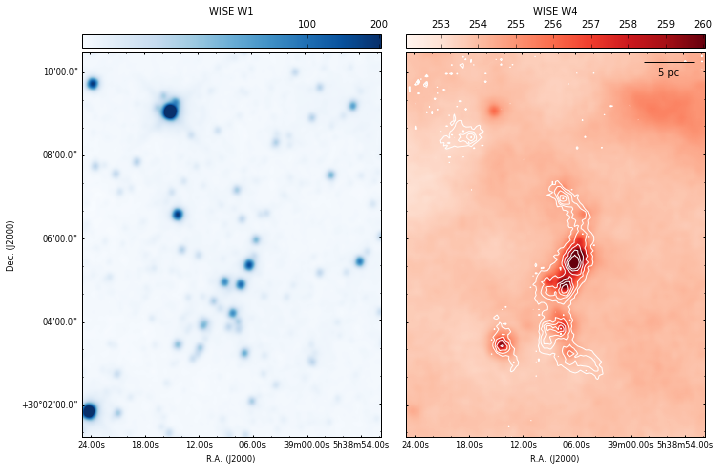

In [4]:
import aplpy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt


def standard_setup(fig):
    fig.frame.set_linewidth(1)
    fig.frame.set_color('black')
    fig.recenter(084.78475, +30.09747, width=0.12, height=0.12)
    fig.show_colorscale(cmap='gist_gray')
    fig.add_colorbar()
    fig.colorbar.set_location('top')
    fig.colorbar.set_font(size='medium', weight='medium', \
                          stretch='normal', family='sans-serif', \
                          style='normal', variant='normal')
    fig.axis_labels.set_xtext('R.A. (J2000)')
    fig.axis_labels.set_ytext('Dec. (J2000)')
    fig.set_tick_labels_font(size='small')
    fig.set_axis_labels_font(size='small')
    fig.ticks.set_length(2)
    fig.ticks.set_color('black')
    fig.ticks.set_linewidth(1.0)
    fig.ticks.set_minor_frequency(3)
    fig.list_layers()


dirpath = r'./data/wise_image/'
outpath = r'./data/wise_image/'

filepath1 = dirpath + r'w2_cut.fits'
filepath2 = dirpath + r'w3_cut.fits'
filepath3 = dirpath + r'w4_cut.fits'

hdulist1 = fits.open(filepath1)
hdulist2 = fits.open(filepath2)
hdulist3 = fits.open(filepath3)

fig1 = plt.figure(figsize=(15, 7))

f1 = aplpy.FITSFigure(hdulist1[0], hdu=hdulist1[0].header, figure=fig1, subplot=[0.1, 0.1, 0.29, 0.8])

standard_setup(f1)
f1.colorbar.show(location='top', log_format=False, ticks=np.linspace(100, 300, 3))
f1.show_colorscale(cmap='Blues', stretch='log')
f1.colorbar.set_axis_label_text('WISE W1')

f1.ticks.show()
f1.axis_labels.show_y()
f1.tick_labels.show_y()
f1.axis_labels.show_x()
f1.tick_labels.show_x()

f2 = aplpy.FITSFigure(hdulist3[0], hdu=hdulist2[0].header, figure=fig1, subplot=[0.40, 0.1, 0.29, 0.8])

standard_setup(f2)
f2.colorbar.show(location='top', log_format=False)
f2.show_colorscale(cmap='Reds', stretch='linear')
f2.colorbar.show(location='top', log_format=False)
f2.colorbar.set_axis_label_text('WISE W4')
f2.add_scalebar(0.02, "5 pc", color='black', corner='top right')
f2.show_contour(r'./data/image_data/G178_final.850.fits', levels=np.linspace(0.08, 0.23, 5), colors='white')

f2.ticks.show()
f2.hide_yaxis_label()
f2.hide_ytick_labels()
f2.axis_labels.show_x()
f2.tick_labels.show_x()


aplpy.make_rgb_cube([filepath1,filepath2,filepath3], outpath+r'wise234_RGB.fits')
aplpy.make_rgb_image(outpath+r'wise234_RGB.fits',
                     outpath+r'rgb_image_wise234.png',
                     stretch_r='linear', 
                     vmid_r=None,
                     pmin_r=10, 
                     pmax_r=98,
                     exponent_r=2,
                     vmin_g=None,
                     vmax_g=None,
                     pmin_g=10,
                     pmax_g=98,
                     stretch_g='linear',
                     vmid_g=None,
                     exponent_g=2,
                     vmin_b=None,
                     vmax_b=None,
                     pmin_b=10,
                     pmax_b=98,
                     stretch_b='linear',
                     vmid_b=None)
fits.setval(outpath+r'wise234_RGB.fits','CTYPE3',value='RGB')

f3 = aplpy.FITSFigure(outpath+r'wise234_RGB.fits', dimensions=[0,1],slices=[2], figure=fig1, subplot=[0.70, 0.1, 0.29, 0.8])
standard_setup(f3)
f3.show_rgb(outpath+r'rgb_image_wise234.png')
f3.colorbar.hide()
f3.add_label(0.8,0.9, 'WISE 2/3/4\nRGB', color='black', relative=True, size='large',layer='source')

f3.ticks.show()
f3.hide_yaxis_label()
f3.hide_ytick_labels()
f3.axis_labels.show_x()
f3.tick_labels.show_x()
plt.show()

fig1.savefig(outpath + 'WISE_test.pdf')


# Healpy 

[healpyreaddocs](https://healpy.readthedocs.io/en/latest/)

### - Introduction

  To take care of fits files of Healpix pixelization schemes (http://healpix.sourceforge.net/downloads.php), including fitsfile io and transformation to standard coordinate systems. 

  This is particularly useful for data from all-sky surveys such as Planck data, or SCUBA2 data release 1.

### - Example (omitted)
http://reproject.readthedocs.io/en/stable/api/reproject.reproject_from_healpix.html#reproject.reproject_from_healpix